## **Task 4: Visualize Data**
<hr/>

### **0. Import & Install libraries**

In [1]:
# Install libraries

In [2]:
# Import libraries
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import pandas as pd
from itertools import combinations
## Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')

<hr/>

### **1. Kết nối và lấy data từ Local MongoDB**

In [3]:
client = MongoClient('mongodb://localhost:27017/')
db = client['T2_PreprocessedData']

In [4]:
# Users Infor
collection = db['Users_Infor']
cursor = collection.find()
data_list = list(cursor)

ui_df = pd.DataFrame(data_list, index = None)
ui_df = ui_df.drop('_id', axis=1, errors='ignore')
ui_df.head()

,user_id,user_name,member_since
0,ur0028288,merrywood,2000-11-01
1,ur0032412,Buckywunder,2000-01-01
2,ur0033913,Sylviastel,2001-01-01
3,ur0035229,Spleen,2001-01-01
4,ur0035641,pk-2,2001-02-01


In [5]:
# Movies Infor
collection = db['Movies_Infor']
cursor = collection.find()
data_list = list(cursor)

mi_df = pd.DataFrame(data_list, index = None)
mi_df = mi_df.drop('_id', axis=1, errors='ignore')
mi_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"['Comedy', 'Drama', 'Family']",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"['Adventure', 'Comedy', 'Drama', 'Romance', 'W...",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"['Drama', 'Sci-Fi']",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"['Action', 'Adventure', 'Comedy', 'Drama', 'War']",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"['Comedy', 'Drama', 'Romance']",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


In [6]:
# Ratings
collection = db['Ratings']
cursor = collection.find()
data_list = list(cursor)

r_df = pd.DataFrame(data_list, index = None)
r_df = r_df.drop('_id', axis=1, errors='ignore')
r_df.head()

,user_id,movie_id,user_rating
0,ur0028288,tt2392830,8.0
1,ur0028288,tt4635282,6.0
2,ur0028288,tt0470752,9.0
3,ur0028288,tt3681794,6.0
4,ur0028288,tt0063442,9.0


<hr/>

### **2. Tiền xử lý dữ liệu**

In [7]:
mi_df['genre'] = mi_df['genre'].apply(eval)

<hr/>

### **3. Trực quan hóa dữ liệu (Thống kê)**

In [8]:
mi_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"[Drama, Sci-Fi]",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"[Action, Adventure, Comedy, Drama, War]",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"[Comedy, Drama, Romance]",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


#### **3.1. Thống kê: Số lượng phim theo từng thể loại:**

##### **1 thể loại:**  

In [9]:
nf_genre1_df = mi_df.copy()

In [10]:
nf_genre1_df = nf_genre1_df.explode('genre')
nf_genre1_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Comedy,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Family,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Adventure,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Comedy,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3


In [11]:
genre1_nfilm = nf_genre1_df['genre'].value_counts()
genre1_nfilm_df = pd.DataFrame({'genre': genre1_nfilm.index, 'num_film': genre1_nfilm.values})
genre1_nfilm_df

,genre,num_film
0,Drama,1860
1,Thriller,1024
2,Comedy,995
3,Action,854
4,Adventure,734
5,Crime,659
6,Mystery,557
7,Sci-Fi,556
8,Romance,545
9,Horror,489


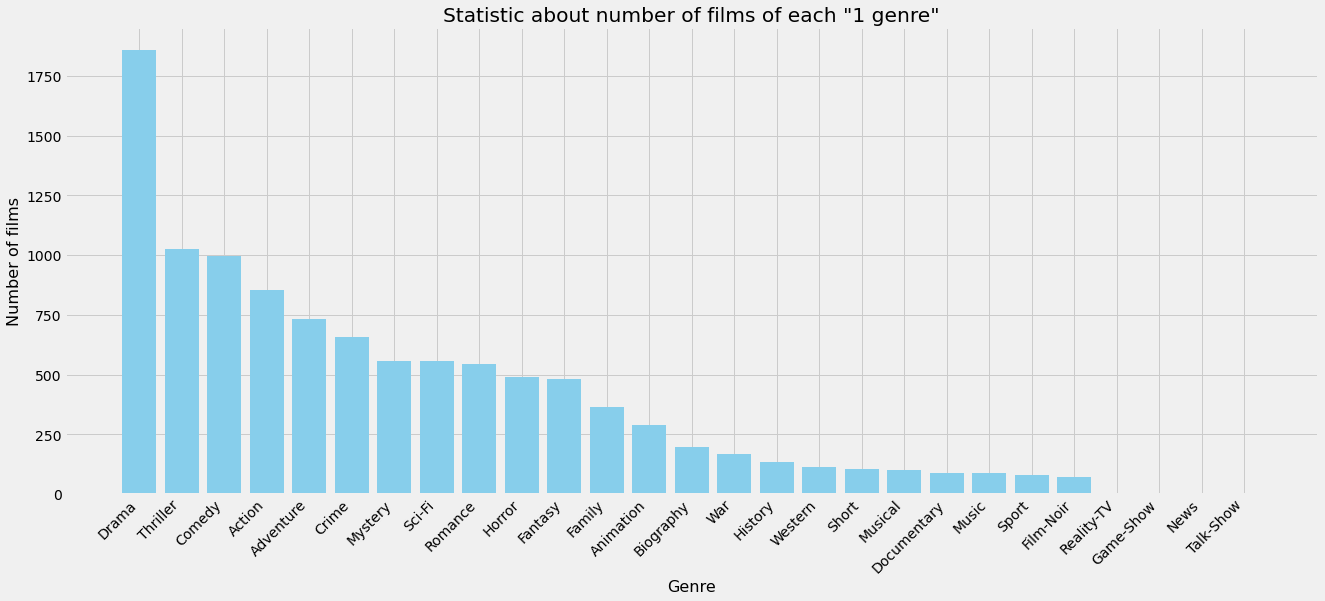

In [12]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(genre1_nfilm_df['genre'], genre1_nfilm_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each "1 genre"')
plt.show()

##### **2 thể loại (Top 10):**

In [13]:
nf_genre2_df = mi_df.copy()

In [14]:
# Create combinations of two elements from the list
nf_genre2_df['2genres'] = nf_genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))

nf_genre2_df = nf_genre2_df.explode('2genres')
nf_genre2_df = nf_genre2_df['2genres'].value_counts()[:10]
nf_genre2_df = pd.DataFrame({'2genres': nf_genre2_df.index, 'num_film': nf_genre2_df.values})
nf_genre2_df['2genres'] = nf_genre2_df['2genres'].astype(str)
nf_genre2_df

,2genres,num_film
0,"('Drama', 'Thriller')",552
1,"('Crime', 'Drama')",452
2,"('Action', 'Adventure')",415
3,"('Action', 'Thriller')",402
4,"('Drama', 'Romance')",393
5,"('Crime', 'Thriller')",389
6,"('Comedy', 'Drama')",374
7,"('Mystery', 'Thriller')",348
8,"('Drama', 'Mystery')",343
9,"('Action', 'Sci-Fi')",321


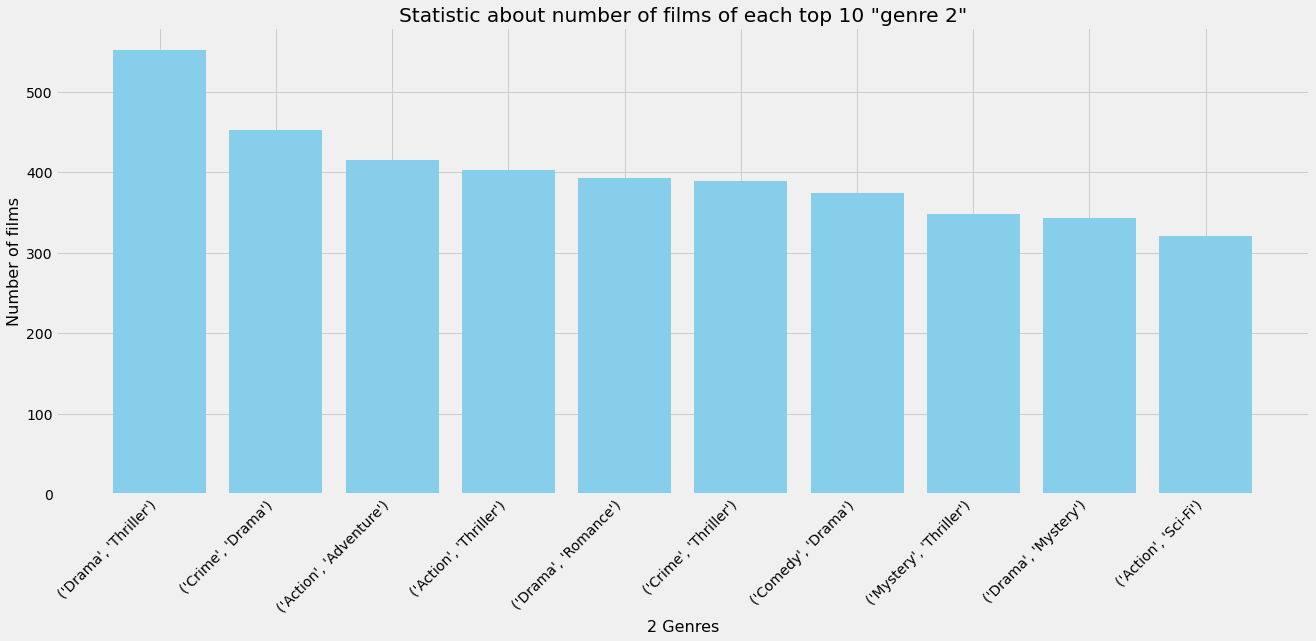

In [15]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(nf_genre2_df['2genres'], nf_genre2_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genres',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each top 10 "genre 2"')
plt.show()

##### **3 thể loại (Top 10):**

In [16]:
nf_genre3_df = mi_df.copy()

In [17]:
# Create combinations of two elements from the list
nf_genre3_df['3genres'] = nf_genre3_df['genre'].apply(lambda x: list(combinations(x, 3)))

nf_genre3_df = nf_genre3_df.explode('3genres')
nf_genre3_df = nf_genre3_df['3genres'].value_counts()[:10]
nf_genre3_df = pd.DataFrame({'3genres': nf_genre3_df.index, 'num_film': nf_genre3_df.values})
nf_genre3_df['3genres'] = nf_genre3_df['3genres'].astype(str)
nf_genre3_df

,3genres,num_film
0,"('Crime', 'Drama', 'Thriller')",264
1,"('Action', 'Adventure', 'Sci-Fi')",215
2,"('Drama', 'Mystery', 'Thriller')",213
3,"('Action', 'Crime', 'Thriller')",157
4,"('Action', 'Drama', 'Thriller')",150
5,"('Action', 'Adventure', 'Fantasy')",147
6,"('Adventure', 'Comedy', 'Family')",147
7,"('Adventure', 'Family', 'Fantasy')",144
8,"('Animation', 'Comedy', 'Family')",144
9,"('Animation', 'Adventure', 'Family')",142


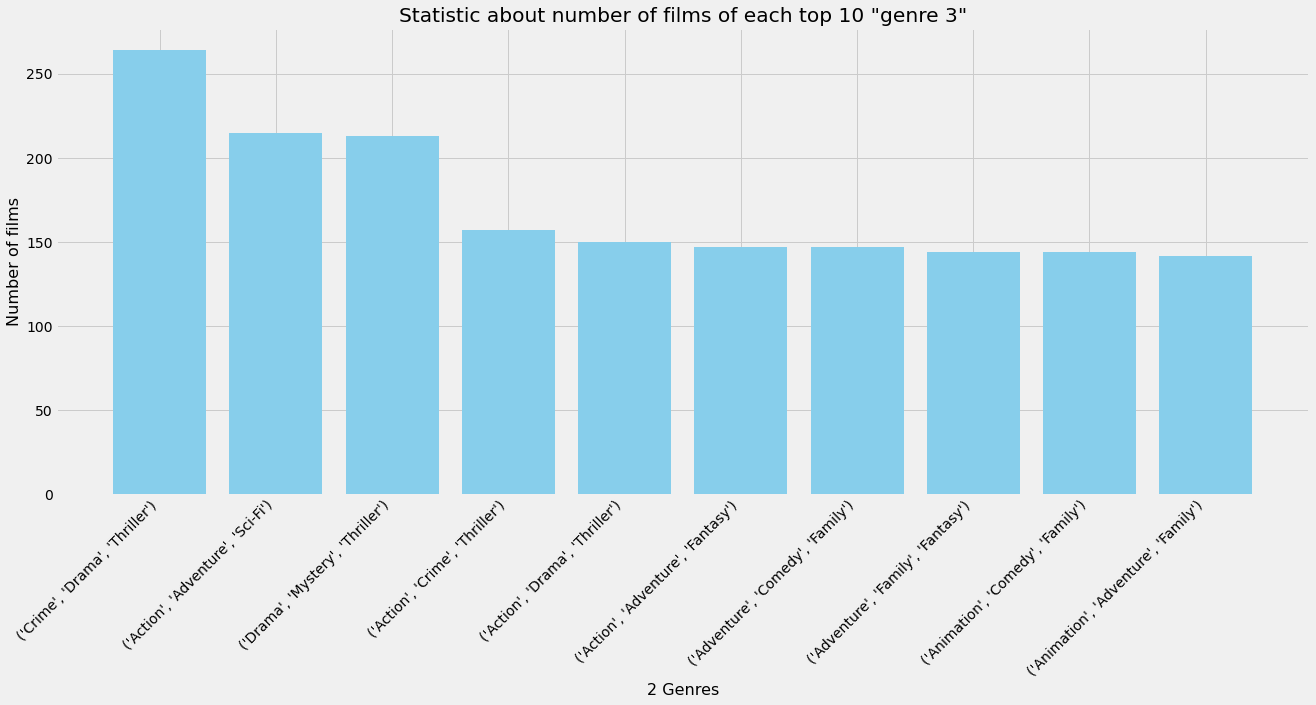

In [18]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(nf_genre3_df['3genres'], nf_genre3_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genres',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each top 10 "genre 3"')
plt.show()

#### **3.2. Thống kê: Số lượng giải thưởng + đề cử theo từng thể loại:**

##### **1 thể loại:**  

In [19]:
tan_genre1_df = mi_df.copy()

In [20]:
tan_genre1_df = tan_genre1_df.explode('genre')
tan_genre1_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Comedy,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Family,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Adventure,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Comedy,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3


In [21]:
tan_genre1_df['totalAN'] = tan_genre1_df['totalAwards'] + tan_genre1_df['totalNominations']

In [22]:
tan_genre1 = tan_genre1_df.groupby('genre')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[:10]
tan_genre1

,totalAN,totalAwards,totalNominations
genre,,,
Drama,81889,27854,54035
Thriller,29712,9502,20210
Adventure,27865,9251,18614
Comedy,27547,8910,18637
Action,26469,8387,18082
Sci-Fi,20638,6245,14393
Romance,19749,6710,13039
Crime,18938,5920,13018
Fantasy,18386,6097,12289


In [23]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre1.index, y=tan_genre1['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre1.index, y=tan_genre1['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 1" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **2 thể loại:**  

In [24]:
tan_genre2_df = mi_df.copy()

In [25]:
tan_genre2_df['2genres'] = tan_genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))
tan_genre2_df = tan_genre2_df.explode('2genres')
tan_genre2_df['2genres'] = tan_genre2_df['2genres'].astype(str)
tan_genre2_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations,2genres
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Drama')"
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Family')"
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Drama', 'Family')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Drama')"


In [26]:
tan_genre2_df['totalAN'] = tan_genre2_df['totalAwards'] + tan_genre2_df['totalNominations']

In [27]:
tan_genre2 = tan_genre2_df.groupby('2genres')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[:10]
tan_genre2

,totalAN,totalAwards,totalNominations
2genres,,,
"('Drama', 'Thriller')",22455,7120,15335
"('Drama', 'Romance')",17830,6039,11791
"('Action', 'Adventure')",17203,5709,11494
"('Comedy', 'Drama')",16343,5400,10943
"('Crime', 'Drama')",16007,5062,10945
"('Adventure', 'Fantasy')",13484,4603,8881
"('Biography', 'Drama')",13079,4210,8869
"('Adventure', 'Sci-Fi')",12790,4105,8685
"('Action', 'Sci-Fi')",12702,3983,8719


In [28]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre2.index, y=tan_genre2['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre2.index, y=tan_genre2['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 2" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **3 thể loại:**  

In [29]:
tan_genre3_df = mi_df.copy()

In [30]:
tan_genre3_df['3genres'] = tan_genre3_df['genre'].apply(lambda x: list(combinations(x, 3)))
tan_genre3_df = tan_genre3_df.explode('3genres')
tan_genre3_df['3genres'] = tan_genre3_df['3genres'].astype(str)
tan_genre3_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations,3genres
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Drama', 'Family')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Drama')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Romance')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Western')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Drama', 'Romance')"


In [31]:
tan_genre3_df['totalAN'] = tan_genre3_df['totalAwards'] + tan_genre3_df['totalNominations']

In [32]:
tan_genre3 = tan_genre3_df.groupby('3genres')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[1:11]
tan_genre3

,totalAN,totalAwards,totalNominations
3genres,,,
"('Action', 'Adventure', 'Sci-Fi')",10171,3348,6823
"('Crime', 'Drama', 'Thriller')",8685,2793,5892
"('Drama', 'Mystery', 'Thriller')",8548,2438,6110
"('Action', 'Adventure', 'Fantasy')",7890,2862,5028
"('Action', 'Adventure', 'Drama')",6280,2190,4090
"('Adventure', 'Drama', 'Fantasy')",5924,2080,3844
"('Biography', 'Drama', 'History')",5546,2015,3531
"('Adventure', 'Family', 'Fantasy')",5494,1783,3711
"('Drama', 'Sci-Fi', 'Thriller')",5484,1592,3892


In [33]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre3.index, y=tan_genre3['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre3.index, y=tan_genre3['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 3" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

<hr/>

### **4. Trực quan hóa dữ liệu (Hệ thống gợi ý)**

#### **4.1. Hệ thống gợi ý: Top n bộ phim theo thể loại**
##### *Filter: 1,2,3 thể loại*

In [34]:
genre_df = mi_df.copy()
genre_df['genre'] = genre_df['genre'].astype(str)

##### **Visualize:**

In [35]:
options = ['drama', 'comedy']
for opt in options: 
    mask = genre_df['genre'].str.lower().str.contains(opt.lower())
    genre_df = genre_df[mask].reset_index()

genre_df.head()

,level_0,index,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,0,0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"['Comedy', 'Drama', 'Family']",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,1,1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"['Adventure', 'Comedy', 'Drama', 'Romance', 'W...",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,3,3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"['Action', 'Adventure', 'Comedy', 'Drama', 'War']",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
3,4,4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"['Comedy', 'Drama', 'Romance']",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0
4,7,7,tt0021749,City Lights,"With the aid of a wealthy erratic tippler, a d...",5220,"['Comedy', 'Drama', 'Romance']",1931-03-07,United States,"['Charles Chaplin', 'Virginia Cherrill', 'Flor...",['Charles Chaplin'],195359.0,8.5,4,0


In [36]:
genre_df = genre_df.sort_values(by='ratingStar',ascending=False)
genre_df = genre_df[['title', 'ratingStar']]
genre_df = genre_df[:10]
genre_df

,title,ratingStar
65,Persona 5 Royal,9.5
167,Minecraft Epic,9.5
70,Persona 5,9.2
238,The Chaos Class,9.2
121,Wilford 'Motherloving' Warfstache,9.1
78,One Piece,9.0
66,Ted Lasso,8.8
30,Six Feet Under,8.7
262,The Boys,8.7
343,This Is Us,8.7


In [37]:
# Plotting Matplotlib
# plt.figure(figsize=(20, 8))
# plt.bar(a_df['title'], a_df['ratingStar'], color='skyblue')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Title',fontsize = 16)
# plt.ylabel('Rating Star',fontsize = 16)
# plt.title('Top 10 Drama Movies have the highest rating star')
# plt.show()

In [38]:
# Plotting Plotly
# Vẽ biểu đồ
fig = px.bar(genre_df, x='ratingStar', y='title', orientation='h', title='Top 10 film drama have the highest average rating star', color_discrete_sequence=['gold'])
fig.show()

##### **Function:**

In [39]:
def rs_genre(df, options):
    genre_df = df.copy()
    genre_df['genre'] = genre_df['genre'].astype(str)
    
    for opt in options: 
        mask = genre_df['genre'].str.lower().str.contains(opt.lower())
        genre_df = genre_df[mask].reset_index()

    genre_df = genre_df.sort_values(by='ratingStar',ascending=False)
    genre_df = genre_df[['movie_id', 'title', 'ratingStar']]
    genre_df = genre_df[:10]

    # fig = px.bar(genre_df, x='ratingStar', y='title', orientation='h', title='Top 10 film drama have the highest average rating star', color_discrete_sequence=['gold'])
    # fig.show()  

    return genre_df[['movie_id', 'title', 'ratingStar']] 

In [40]:
# Test
df = mi_df.copy()
rs_genre(df, ['comedy', 'drama'])

,movie_id,title,ratingStar
65,tt10468596,Persona 5 Royal,9.5
167,tt10680606,Minecraft Epic,9.5
70,tt3944082,Persona 5,9.2
238,tt0252487,The Chaos Class,9.2
121,tt9357776,Wilford 'Motherloving' Warfstache,9.1
78,tt0388629,One Piece,9.0
66,tt10986410,Ted Lasso,8.8
30,tt0248654,Six Feet Under,8.7
262,tt1190634,The Boys,8.7
343,tt5555260,This Is Us,8.7


#### **4.2. Hệ thống gợi ý: Advanced search**

In [41]:
as_df = mi_df.copy()

In [42]:
as_df.columns

Index(['movie_id', 'title', 'introduction', 'runtimeSeconds', 'genre',
       'releaseDate', 'releaseLocation', 'actors', 'directors', 'totalRatings',
       'ratingStar', 'totalAwards', 'totalNominations'],
      dtype='object')

##### **Visualize:**

In [79]:
options = {
    'title': "o",
    'genre': ["drama", "comedy"],
    'actors': "", 
    'directors': "",
    'releaseLocation': "u", 
    'releaseDate': '06-1920',
    'ratingStar': 9
}

In [80]:
as_df = mi_df.copy()
as_df['genre'] = as_df['genre'].astype(str)
as_df['actors'] = as_df['actors'].astype(str)
as_df['directors'] = as_df['directors'].astype(str)

for idx in options.keys():
    ### Filter:
    if (idx == 'title'):
        if options[idx] != "":
            mask = as_df['title'].str.lower().str.contains(options['title'].lower())
            as_df = as_df[mask]

    if (idx == 'genre'):
        if options[idx]: 
            for opt in options[idx]:
                mask = as_df['genre'].str.lower().str.contains(opt.lower())
                as_df = as_df[mask]

    if (idx == 'actors'):
        if options[idx] != "":
            mask = as_df['actors'].str.lower().str.contains(options['actors'].lower())
            as_df = as_df[mask]
    
    if (idx == 'directors'):
        if options[idx] != "":
            mask = as_df['directors'].str.lower().str.contains(options['directors'].lower())
            as_df = as_df[mask]

    if (idx == 'releaseLocation'):
        if options[idx] != "":
            mask = as_df['releaseLocation'].str.lower().str.contains(options['releaseLocation'].lower())
            as_df = as_df[mask]

    ### Sort By:
    if (idx == 'releaseDate'):
            if options[idx] != "": 
                mask = as_df['releaseDate'] >= options[idx]
                as_df = as_df[mask]
                as_df = as_df.sort_values(by='releaseDate',ascending=False)
                
    if (idx == 'ratingStar'):
            if options[idx] != "": 
                mask = as_df['ratingStar'] >= options[idx]
                as_df = as_df[mask]
                as_df = as_df.sort_values(by='ratingStar',ascending=False)
    



In [81]:
# Plotting Plotly
# Vẽ biểu đồ
fig = px.bar(as_df, x='ratingStar', y='title', orientation='h', title='Top 10 film have the highest average rating star', color_discrete_sequence=['gold'])
# Tạo chuỗi chú thích từ dictionary
annotation_text = "<b>Thông tin phim:</b><br>"
for key, value in options.items():
    annotation_text += f"<b>{key.capitalize()}:</b> {value}<br>"

# Thiết lập chú thích
fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=0.5,
            xref="paper",
            yref="paper",
            text=annotation_text,
            showarrow=False
        )
    ]
)
fig.show()

##### **Function:**

In [71]:
def rs_asearch(df, options):
    as_df = df.copy()
    as_df['genre'] = as_df['genre'].astype(str)
    as_df['actors'] = as_df['actors'].astype(str)
    as_df['directors'] = as_df['directors'].astype(str)
    
    for idx in options.keys():
        ### Filter:
        if (idx == 'title'):
            if options[idx] != "":
                mask = as_df['title'].str.lower().str.contains(options['title'].lower())
                as_df = as_df[mask]

        if (idx == 'genre'):
            if options[idx]: 
                for opt in options[idx]:
                    mask = as_df['genre'].str.lower().str.contains(opt.lower())
                    as_df = as_df[mask]

        if (idx == 'actors'):
            if options[idx] != "":
                mask = as_df['actors'].str.lower().str.contains(options['actors'].lower())
                as_df = as_df[mask]
        
        if (idx == 'directors'):
            if options[idx] != "":
                mask = as_df['directors'].str.lower().str.contains(options['directors'].lower())
                as_df = as_df[mask]

        if (idx == 'releaseLocation'):
            if options[idx] != "":
                mask = as_df['releaseLocation'].str.lower().str.contains(options['releaseLocation'].lower())
                as_df = as_df[mask]

        ### Sort By:
        if (idx == 'releaseDate'):
                if options[idx] != "": 
                    mask = as_df['releaseDate'] >= options[idx]
                    as_df = as_df[mask]
                    as_df = as_df.sort_values(by='releaseDate',ascending=False)
                    
        if (idx == 'ratingStar'):
                if options[idx] != "": 
                    mask = as_df['ratingStar'] >= options[idx]
                    as_df = as_df[mask]
                    as_df = as_df.sort_values(by='ratingStar',ascending=False)

    return as_df

In [72]:
df = mi_df.copy()
options = {
    'title': "",
    'genre': ["drama", "comedy"],
    'actors': "", 
    'directors': "",
    'releaseLocation': "", 
    'releaseDate': '06-2010',
    'ratingStar': 8
}
rs_asearch(df, options)

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
678,tt10468596,Persona 5 Royal,A group of high school students create a vigil...,0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2020-03-31,United States,"['Jun Fukuyama', 'Ikue Ôtani', 'Mamoru Miyano']",['Daiki Itô'],2266.0,9.5,0,1
1653,tt10680606,Minecraft Epic,Pewdiepie has epic adventures in Minecraft. Wi...,0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2019-06-21,United Kingdom,"['Felix Kjellberg', 'Joergen', 'Water Sheep']",[],4009.0,9.5,0,0
706,tt3944082,Persona 5,A group of high school students create a vigil...,0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2017-04-04,United States,"['Jun Fukuyama', 'Mamoru Miyano', 'Nana Mizuki']",['Katsura Hashino'],3343.0,9.2,7,11
1262,tt9357776,Wilford 'Motherloving' Warfstache,After the events of Who Killed Markiplier? (20...,1140,"['Short', 'Comedy', 'Drama']",2018-08-05,United States,"['Mark Fischbach', 'Mick Lauer', 'Lucy Marie S...",['Mark Fischbach'],216.0,9.1,0,0
680,tt10986410,Ted Lasso,American college football coach Ted Lasso head...,1800,"['Comedy', 'Drama', 'Sport']",2020-08-14,United States,"['Jason Sudeikis', 'Hannah Waddingham', 'Jerem...",[],344576.0,8.8,86,236
2379,tt1190634,The Boys,A group of vigilantes set out to take down cor...,3600,"['Action', 'Comedy', 'Crime', 'Drama', 'Sci-Fi']",2019-07-26,United States,"['Karl Urban', 'Jack Quaid', 'Antony Starr']",[],647028.0,8.7,21,82
3202,tt5555260,This Is Us,A heartwarming and emotional story about a uni...,2700,"['Comedy', 'Drama', 'Romance']",2016-09-20,United States,"['Milo Ventimiglia', 'Mandy Moore', 'Sterling ...",[],159005.0,8.7,67,293
1987,tt4288182,Atlanta,"Earn and his cousin, Alfred, try to make their...",1800,"['Comedy', 'Drama', 'Music']",2016-09-06,United States,"['Donald Glover', 'Brian Tyree Henry', 'LaKeit...",[],87753.0,8.6,60,148
3216,tt7221388,Cobra Kai,Decades after their 1984 All Valley Karate Tou...,1800,"['Action', 'Comedy', 'Drama', 'Sport']",2018-05-02,United States,"['Ralph Macchio', 'William Zabka', 'Courtney H...",[],203616.0,8.5,4,65
536,tt1675434,The Intouchables,After he becomes a quadriplegic from a paragli...,6720,"['Comedy', 'Drama']",2011-11-02,France,"['François Cluzet', 'Omar Sy', 'Anne Le Ny']","['Olivier Nakache', 'Éric Toledano']",924776.0,8.5,38,40
